<a href="https://colab.research.google.com/github/nasir-uddin-66/Machine-Learning-with-python/blob/main/SVM(SVC)_ChurnModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVC)

Customer Churn Modeling

##Import libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

##Preprocessing

In [13]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
x = df.drop('Exited', axis=1)
y = df['Exited']

##Label pie chart

([<matplotlib.patches.Wedge at 0x7e95ca6f26d0>,
 [Text(-0.8823432229396718, 0.656864093197697, 'No'),
  Text(0.8823431237559431, -0.6568642264278096, 'Yes')],
 [Text(-0.4812781216034573, 0.358289505380562, '80%'),
  Text(0.48127806750324165, -0.35828957805153244, '20%')])

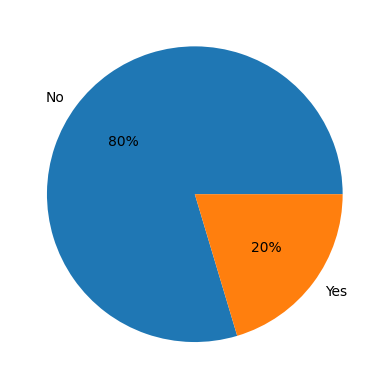

In [18]:
label = y.map({0: 'No', 1: 'Yes'})
plt.pie(y.value_counts(), labels=label.value_counts().index, autopct='%1.0f%%')

##Standardization

In [19]:
feature_x = StandardScaler().fit_transform(x)
feature_x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

##Split Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(feature_x, y, test_size=0.25, random_state=42)

##Apply SVM

In [21]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [22]:
svc.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

##Score

In [23]:
svc.score(x_test, y_test)

0.8588